# Исследование гипотез для увеличения выручки интернет-магазина

**Цель исследования:**
* Приоритизировать гипотезы, проанализировать результаты А/В теста.

**Описание данных**

Таблица `hypothesis.csv`:
* `Hypothesis` —  краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале (чем больше значение Efforts, тем дороже проверка гипотезы).

Таблица `orders.csv`:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Таблица `visitors.csv`:
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

**План работы**<a id='1A'></a>
* [приоритизация гипотез](#1): применение фреймворков `ICE` и `RICE` для приоритизации гипотез
* А/В тест:
* [ознакомление с данными](#2): количество пропусков, изучение общей информации о датафреймах
* [предобработка данных](#3): поиск и удаление дубликатов, зполнение пропущенных значений, изменение форматов столбцов
* [анализ результатов А/B теста](#4): построение графиков кумулятивной конверсии и среднего чека по «сырым» и «очищенным» данным, рассчет статистической значимости различий конверсии и среднего чека между группами
* [общий вывод](#5): подведение итогов исследования

<a id='1'></a>
### [Приоритизация гипотез](#1A)

In [1]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк `ICE` для приоритизации гипотез.

In [4]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['ICE'] = round(hypothesis['ICE'], 2)
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Применим фреймворк `RICE` для приоритизации гипотез.

In [5]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При приоритизации гипотез методом `ICE` лидируют гипотезы под номерами 8, 0, 7. При приоритизации гипотез методом `RICE` лидируют гипотезы под номерами 7, 2, 0, 6. В данном случае гипотезы 7 и 2 заняли лидирующие позиции благодаря широкому охвату аудитории и достаточно низкому показателю затрат на проверку гипотез.

### A/B-тест.

<a id='2'></a>
### [Ознакомление с данными](#1A)

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
display(orders.head())
visitors.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблицах отсутствуют пропущение значения, формат столбцов `date` нужно изменить на datetime.

<a id='3'></a>
### [Предобработка данных](#1A)

Приведем столбцы `date` в обоих датафреймах к формату datetime.

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим таблицы на наличие явных дубликатов.

In [10]:
display(orders.duplicated().sum())
visitors.duplicated().sum()

0

0

Явные лубликаты отсутствуют.

Проверим таблицу `orders` на наличие покупателей которые попали в обе группы теста.

In [11]:
Agroup = orders[orders['group'] == 'A']
Bgroup = orders[orders['group'] == 'B']
ABgroups = orders[orders['visitorId'].isin(Agroup['visitorId']) & orders['visitorId'].isin(Bgroup['visitorId'])]
display(ABgroups)
ABgroups['visitorId'].nunique()

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,1290,B
1183,1458356232,963407295,2019-08-14,4940,A
1184,1329499668,2949041841,2019-08-14,10380,B
1189,4082620617,393266494,2019-08-14,31550,B


58

В группы А и В сразу попали 58 покупателей, удалим их, чтобы они не искажали результаты исследования.

In [12]:
orders = orders[~orders['visitorId'].isin(ABgroups['visitorId'])]

Посмотрим на распределение количества посетителей по группам.

In [13]:
visitors.groupby('group').agg({'visitors' : 'sum'}).reset_index()

,group,visitors
0,A,18736
1,B,18916


Количество посетителей распределено по группам примерно одинаково: влияние на результаты А/В теста должны быть минимальными.

На этапе предобработки данных мы привели столбцы с датами к нужному формату, выяснили что в таблицах нет явных дубликотов, удалили покупителей которые попали сразу в обе группы теста, узнали, что распределение посетителей по группам примерно одинаковое и не должно сказаться на результатах теста.

<a id='4'></a>
### [Анализ результатов А/B теста](#1A)

#### Построим график кумулятивной выручки по группам.

Подготовим данный для анализа: создадим общую таблицу с кумулятивными занчениями заказов и посетитиелей по группам.

In [14]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily = visitorsADaily.rename(columns = {'visitors' : 'visitorsPerDateA'})
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                           .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative = visitorsACummulative.rename(columns = {'visitorsPerDateA' : 'visitorsCummulativeA'})
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily = visitorsBDaily.rename(columns = {'visitors' : 'visitorsPerDateB'})
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                           .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative = visitorsBCummulative.rename(columns = {'visitorsPerDateB' : 'visitorsCummulativeB'})
ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
               .groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily = ordersADaily.rename(columns = {'transactionId' : 'ordersPerDateA', 'revenue' : 'revenuePerDateA'})
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
                                       .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1)\
                                       .sort_values(by=['date'])
ordersACummulative = ordersACummulative\
                    .rename(columns = {'ordersPerDateA' : 'ordersCummulativeA', 'revenuePerDateA' : 'revenueCummulativeA'})
ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
               .groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily = ordersBDaily.rename(columns = {'transactionId' : 'ordersPerDateB', 'revenue' : 'revenuePerDateB'})
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
                                       .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1)\
                                       .sort_values(by=['date'])
ordersBCummulative = ordersBCummulative\
                    .rename(columns = {'ordersPerDateB' : 'ordersCummulativeB', 'revenuePerDateB' : 'revenueCummulativeB'})
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
                   .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
                   .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
                   .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
                   .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
                   .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
                   .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Построим график кумулятивной выручки по группам.

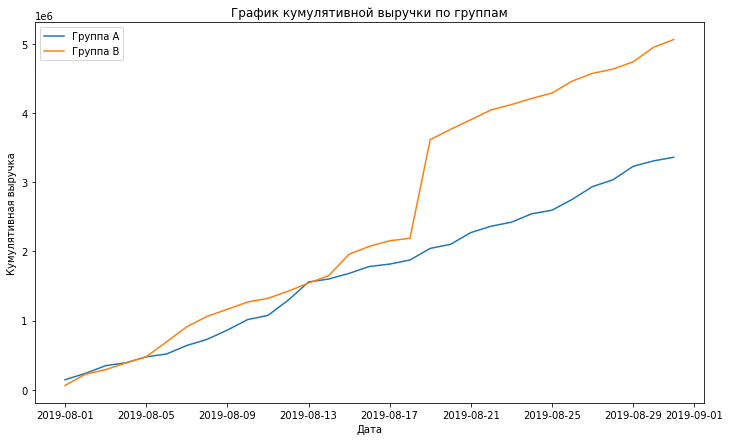

In [15]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], data['revenueCummulativeA'], label='Группа А')
plt.plot(data['date'], data['revenueCummulativeB'], label='Группа B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.show()

Из графика видно, что выручка растет в течение всего времени проведения эксперимента. При этом в группе В есть резкий скачок выручки, который может свидетельствовать об аномалиях, например об очень дорогой покупке.

#### Построим график кумулятивного среднего чека по группам.

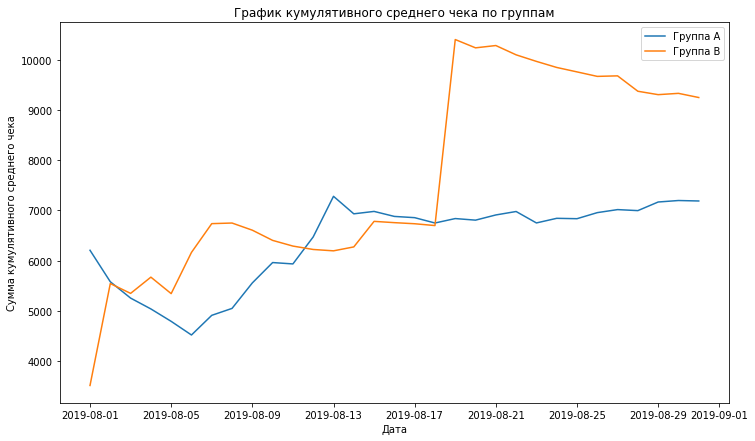

In [16]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], data['revenueCummulativeA'] / data['ordersCummulativeA'], label='Группа А')
plt.plot(data['date'], data['revenueCummulativeB'] / data['ordersCummulativeB'], label='Группа B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма кумулятивного среднего чека')
plt.legend()
plt.show()

Показатели среднего чека колеблются в начале теста и устанавливаются ближе к концу теста. Как и вслучае с кумулятивной выручкой имеется резких скачок среднего чека в группе В, которое может свидетельствовать об очень крупном заказе/заказах, затем наблюдается снижение среднего чека в указанной группе.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

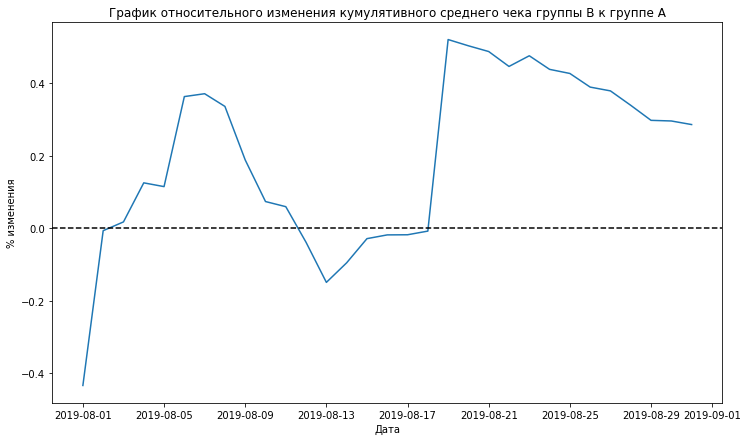

In [17]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], (data['revenueCummulativeB'] / data['ordersCummulativeB'])\
         / (data['revenueCummulativeA'] / data['ordersCummulativeA']) - 1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('% изменения')
plt.show()

На графике наблюдаются резкие скачки различий среднего чека между группами. Это свидетельствует о наличии аномалий в данных.

#### Построим график кумулятивного среднего количества заказов по группам (конверсии).

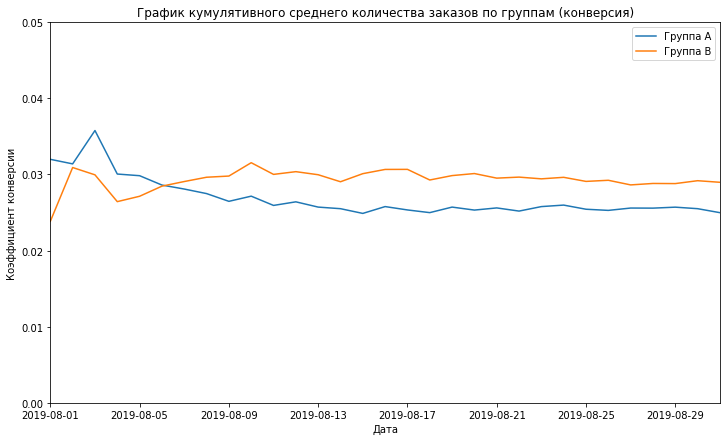

In [18]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], data['ordersCummulativeA'] / data['visitorsCummulativeA'], label='Группа А')
plt.plot(data['date'], data['ordersCummulativeB'] / data['visitorsCummulativeB'], label='Группа B')
plt.title('График кумулятивного среднего количества заказов по группам (конверсия)')
plt.xlabel('Дата')
plt.ylabel('Коэффициент конверсии')
plt.legend()
plt.axis([data['date'].min(), data['date'].max(), 0, 0.05]) 
plt.show()

Сначала конверсия группы А была выше, затем конверсия групы Б вышла вперед и лидирует вплодь до конца теста. С течением времени конверсия стабилизировалась.

#### Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A.

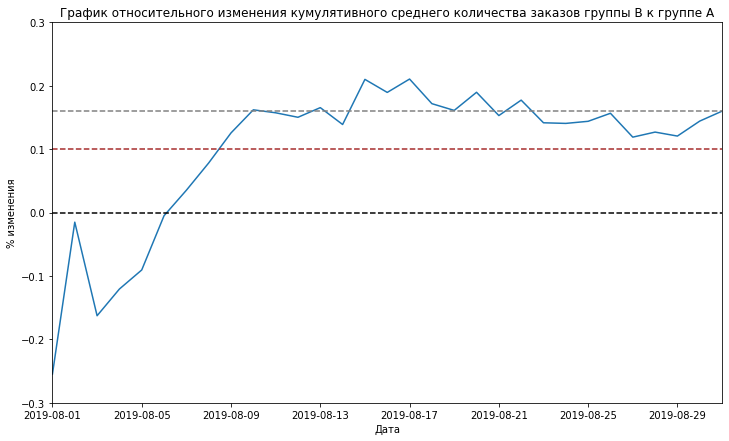

In [19]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], (data['ordersCummulativeB'] / data['visitorsCummulativeB'])\
         / (data['ordersCummulativeA'] / data['visitorsCummulativeA']) - 1)
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.10, color='brown', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.axis([data['date'].min(), data['date'].max(), -0.3, 0.3])
plt.xlabel('Дата')
plt.ylabel('% изменения')
plt.show()

Относительное изменение конверсии группы В к группе А характеризуется резкими всплесками в начале эксперимента, затем небольшими подъемами и спадами. В целом отношение конверсии еще не установилось.

#### Построим точечный график количества заказов по пользователям.

In [20]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsers = ordersByUsers.rename(columns={'transactionId' : 'orders'})

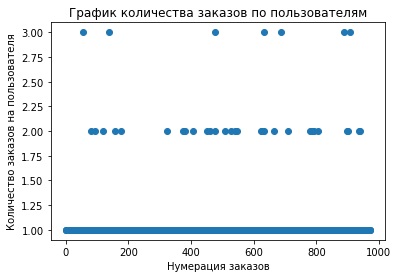

In [21]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Нумерация заказов')
plt.ylabel('Количество заказов на пользователя')
plt.show()

Большинство пользователей делают 1 заказ, есть пользователи с 2-3 заказами.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [22]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформли более 1 заказа и не более 1% пользователей оформили более 2 заказов. Будем считать аномальными покупателей, которые совершили более 2 покупок.

#### Построим точечный график стоимостей заказов.

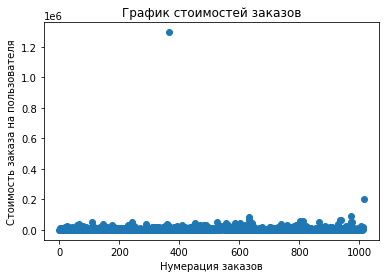

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Нумерация заказов')
plt.ylabel('Стоимость заказа на пользователя')
plt.show()

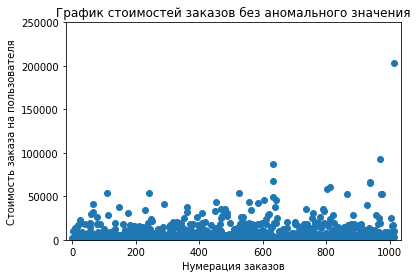

In [24]:
plt.scatter(x_values, orders['revenue'])
plt.axis([x_values.min() - 20, x_values.max() + 20, 0, 0.25*10**6])
plt.title('График стоимостей заказов без аномального значения')
plt.xlabel('Нумерация заказов')
plt.ylabel('Стоимость заказа на пользователя')
plt.show()

Судя по графику стоимость большинства заказов значительно меньше 100000. При этом есть заказ стоимостью выше 1.2 млн.

Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [25]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов стоят более 26785 и не более 1% стоят более 53904. Будем считать аномальными покупателей которые совершили покупки на сумму дороже 26785.

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным.
Примем за нулевую гипотезу, что различий в среднем количестве заказов между группами нет, альтернативня гипотеза: различия в среднем количестве заказов между группами есть.
Уровень значимости alpha = 0.05.

In [26]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersA = ordersByUsersA.rename(columns={'transactionId' : 'orders'})
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersB = ordersByUsersB.rename(columns={'transactionId' : 'orders'})
sampleA = pd.concat([ordersByUsersA['orders'],\
                pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],\
                   axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],\
                pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],\
                   axis=0)

In [27]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("относительный прирост среднего числа заказов группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
относительный прирост среднего числа заказов группы B: 0.160


p-value меньше уровня значимости alpha. В результате проверки гипотезы можно сказать, что по имеющимся «сырым» данным на уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативы: различия в среднем числе заказов групп A и B есть. Относительный прирост среднего числа заказов группы В равен 16%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
Примем за нулевую гипотезу, что различий в среднем чеке заказа между группами нет, альтернативня гипотеза: различия в среднем чеке заказа между группами есть.
Уровень значимости alpha = 0.05.

In [28]:
print('p-value: {0:.3f}'\
      .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительный прирост среднего чека заказа группы B: {0:.3f}'\
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
относительный прирост среднего чека заказа группы B: 0.287


p-value значительно больше уровня значимости alpha. В результате проверки гипотезы можно сказать, что по имеющимся «сырым» данным на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу об отсутствии различий в среднем чеке заказа между группами в пользу альтернативы. Относительный прирост среднего чека заказа группы В равен 28,7%, при учете верности нулевой гипотезы о равенстве сердних чеков, можно предположить что такой прирост связан с влиянием выбросов.

Исключим аномальных пользователей из исследования.

In [29]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > \
                                 np.percentile(ordersByUsers['orders'], 99)]['visitorId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > \
                                 np.percentile(ordersByUsers['orders'], 99)]['visitorId']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
abnormalUsers.shape[0]

58

In [30]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],\
    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],\
    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. 
Примем за нулевую гипотезу, что различий в среднем количестве заказов между группами нет, альтернативня гипотеза: различия в среднем количестве заказов между группами есть. Уровень значимости alpha = 0.05.

In [31]:
print('p-value: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный прирост среднего числа заказов группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.01235
относительный прирост среднего числа заказов группы B: 0.182


p-value меньше уровня значимости alpha. В результате проверки гипотезы можно сказать, что по имеющимся «очищенным» данным на уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативы: различия в среднем числе заказов групп A и B есть. Относительный прирост среднего числа заказов группы В равен 18,7%, наблюдается увеличение на 2,7 процентных пункта по сравнению с  «сырыми» данными.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
Примем за нулевую гипотезу, что различий в среднем чеке заказа между группами нет, альтернативня гипотеза: различия в среднем чеке заказа между группами есть.
Уровень значимости alpha = 0.05.

In [32]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
                         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],\
                         orders[np.logical_and(orders['group'] == 'B',\
                         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
print('относительный прирост среднего чека заказа группы B: {0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B',\
                         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / \
                         orders[np.logical_and(orders['group'] == 'A',\
                         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value: 0.646
относительный прирост среднего чека заказа группы B: -0.048


p-value значительно больше уровня значимости alpha. В результате проверки гипотезы можно сказать, что по имеющимся «очищенным» данным на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу об отсутствии различий в среднем чеке заказа между группами в пользу альтернативы. Относительный прирост среднего чека заказа группы В равен -2,7%. После удаления выбросов относительный прирост среднего чека заказа группы В упал аж на 31,4 процентных пункта.

#### Для сравнения построим графики рассмотреных выше показателей по «очищенным» данным.

In [33]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily = visitorsADaily.rename(columns = {'visitors' : 'visitorsPerDateA'})
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                           .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative = visitorsACummulative.rename(columns = {'visitorsPerDateA' : 'visitorsCummulativeA'})
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily = visitorsBDaily.rename(columns = {'visitors' : 'visitorsPerDateB'})
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                           .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative = visitorsBCummulative.rename(columns = {'visitorsPerDateB' : 'visitorsCummulativeB'})
ordersADaily = orders[np.logical_and(orders['group'] == 'A',\
                         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]\
                         [['date', 'transactionId', 'visitorId', 'revenue']]\
               .groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily = ordersADaily.rename(columns = {'transactionId' : 'ordersPerDateA', 'revenue' : 'revenuePerDateA'})
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
                                       .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1)\
                                       .sort_values(by=['date'])
ordersACummulative = ordersACummulative\
                    .rename(columns = {'ordersPerDateA' : 'ordersCummulativeA', 'revenuePerDateA' : 'revenueCummulativeA'})
ordersBDaily = orders[np.logical_and(orders['group'] == 'B',\
                         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]\
                         [['date', 'transactionId', 'visitorId', 'revenue']]\
               .groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily = ordersBDaily.rename(columns = {'transactionId' : 'ordersPerDateB', 'revenue' : 'revenuePerDateB'})
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
                                       .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1)\
                                       .sort_values(by=['date'])
ordersBCummulative = ordersBCummulative\
                    .rename(columns = {'ordersPerDateB' : 'ordersCummulativeB', 'revenuePerDateB' : 'revenueCummulativeB'})
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
                   .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
                   .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
                   .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
                   .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
                   .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
                   .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

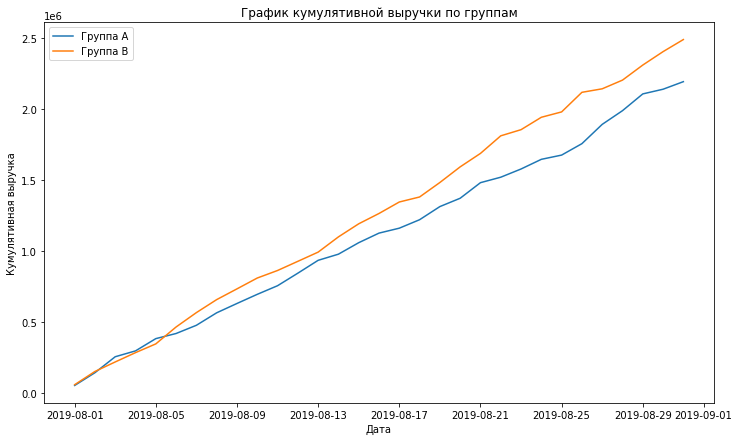

In [34]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], data['revenueCummulativeA'], label='Группа А')
plt.plot(data['date'], data['revenueCummulativeB'], label='Группа B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.show()

По графику видно, что после удаления аномалий исчез и резкий скачок выручки в группе В, при этом она все равно лидирует.

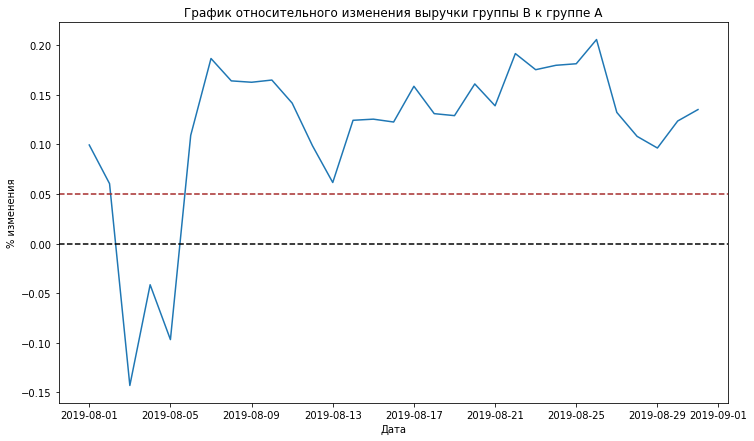

In [35]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], data['revenueCummulativeB'] /  data['revenueCummulativeA'] - 1)
plt.title('График относительного изменения выручки группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('% изменения')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.05, color='brown', linestyle='--')
plt.show()

Данный график показывает, что после неудачного старта все отсальное время группа В лидирует.

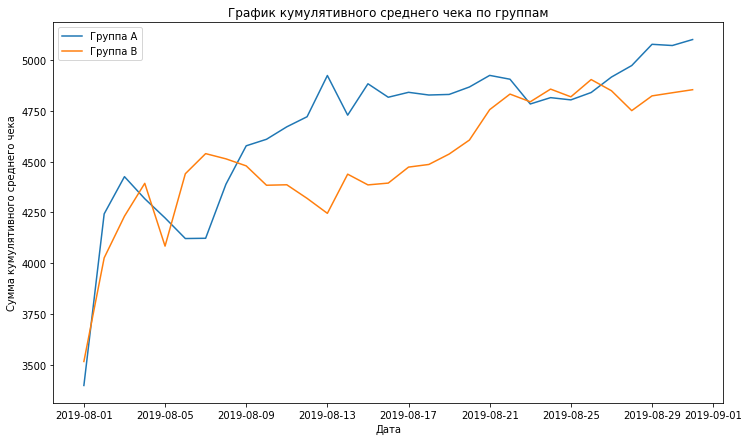

In [36]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], data['revenueCummulativeA'] / data['ordersCummulativeA'], label='Группа А')
plt.plot(data['date'], data['revenueCummulativeB'] / data['ordersCummulativeB'], label='Группа B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма кумулятивного среднего чека')
plt.legend()
plt.show()

После очистки данных средний чек группы В в конце эксперимента стал чунь ниже группы А.

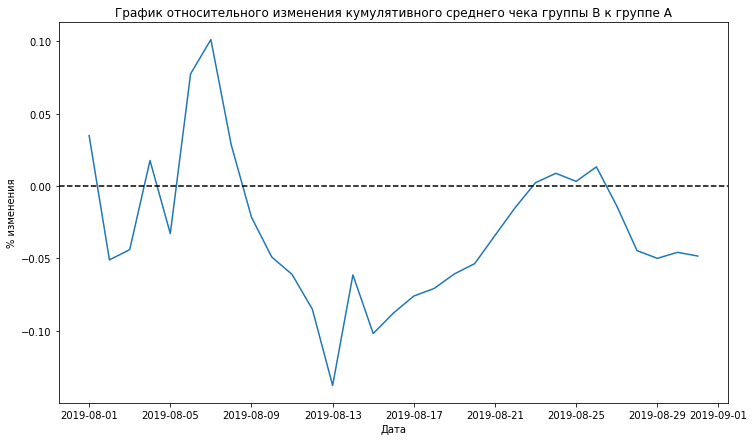

In [37]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], (data['revenueCummulativeB'] / data['ordersCummulativeB'])\
         / (data['revenueCummulativeA'] / data['ordersCummulativeA']) - 1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('% изменения')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

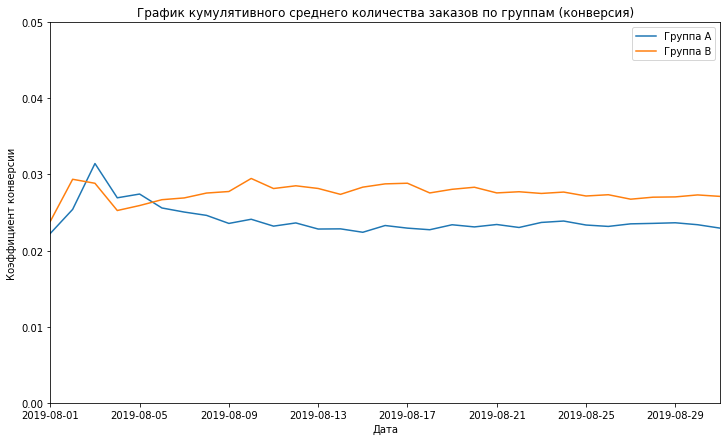

In [38]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], data['ordersCummulativeA'] / data['visitorsCummulativeA'], label='Группа А')
plt.plot(data['date'], data['ordersCummulativeB'] / data['visitorsCummulativeB'], label='Группа B')
plt.title('График кумулятивного среднего количества заказов по группам (конверсия)')
plt.xlabel('Дата')
plt.ylabel('Коэффициент конверсии')
plt.legend()
plt.axis([data['date'].min(), data['date'].max(), 0, 0.05]) 
plt.show()

Даже после удаления аномалий конверсия группы В выше, чем у группы А.

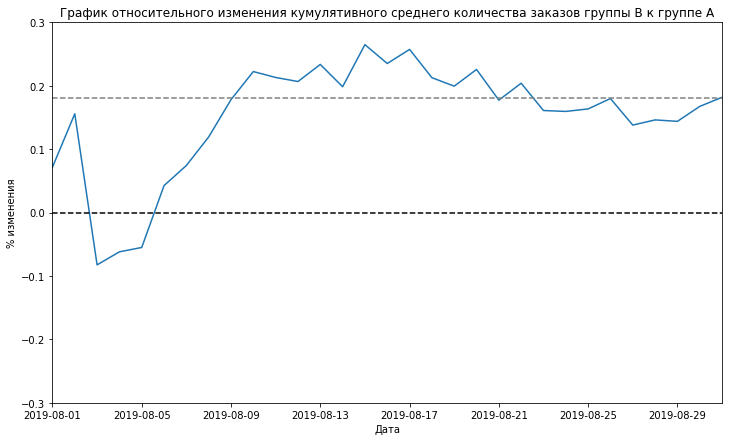

In [39]:
plt.figure(figsize=(12, 7))
plt.plot(data['date'], (data['ordersCummulativeB'] / data['visitorsCummulativeB'])\
         / (data['ordersCummulativeA'] / data['visitorsCummulativeA']) - 1)
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('% изменения')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.18, color='grey', linestyle='--')
plt.axis([data['date'].min(), data['date'].max(), -0.3, 0.3]) 
plt.show()

Таким образом мы видим, что есть различия в конверсии между группами как по «сырым» данным, так и по «очищенным», при этом лидирует группа В. Различий в среднем чеке заказа между группами нет как по «сырым» данным, так и по «очищенным», при этом по «сырым» данным группа В впереди на 28,7%, а по «очищенным» отстает от группы А на 2,7%. Вместе с тем показатель выручки группы В как по «сырым» данным, так и по «очищенным» выше группы А. С учетом увеличения превышения конверсии группы В над группой А, а также большей выручки группы В при одинаковом среднем чеке рекомендуется остановить тест и зафиксировать победу группы В.

<a id='5'></a>
### [Общий вывод](#1A)

На этапе приоритизации гипотез выяснили:
при приоритизации гипотез методом `ICE` лидируют гипотезы под номерами 8, 0, 7. При приоритизации гипотез методом `RICE` лидируют гипотезы под номерами 7, 2, 0, 6. В данном случае гипотезы 7 и 2 заняли лидирующие позиции благодаря широкому охвату аудитории и достаточно низкому показателю затрат на проверку гипотез.

А/В тест

На этапе озакомления с данными мы выяснили, что в таблицах отсутствуют пропущение значения, формат столбцов date нужно изменить на datetime.

На этапе предобработки данных мы привели столбцы с датами к нужному формату, выяснили что в таблицах нет явных дубликотов, удалили покупителей которые попали сразу в обе группы теста, узнали, что распределение посетителей по группам примерно одинаковое и не должно сказаться на результатах теста.

На этапе анализа А/В теста:
выяснили, что есть различия в конверсии между группами как по «сырым» данным, так и по «очищенным», при этом лидирует группа В. Различий в среднем чеке заказа между группами нет как по «сырым» данным, так и по «очищенным», при этом по «сырым» данным группа В впереди на 28,7%, а по «очищенным» отстает от группы А на 2,7%. Вместе с тем показатель выручки группы В как по «сырым» данным, так и по «очищенным» выше группы А. С учетом увеличения превышения конверсии группы В над группой А, а также большей выручки группы В при одинаковом среднем чеке рекомендуется остановить тест и зафиксировать победу группы В.